In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

# Hysteresis loops

In this notebook I will analyze the hysteresis loops at different mT/s rates. 

    Choose the change_m_time data that you want to analyze!

In [2]:
change_m_time = 20000
number_of_runs = 10

### 1. First, I will read the data to be analyzed. 

In [3]:
Bi_imput = "/home/carolina/DataFrames_Summer_2020"

In [4]:
import fnmatch
import os

Bi = []
for file in os.listdir(Bi_imput):
    if fnmatch.fnmatch(file, '*'+str(change_m_time)+'_exp*.dat'):
        print(file)
        Bi.append(pd.read_csv(join(Bi_imput,file), sep = "\t", index_col = [0,1])) 
        
keys_Bi = []
for i in range(len(Bi)):
    keys_Bi.append(i)

BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp12.dat


/home/carolina/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp2.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp9.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp3.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp15.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp1.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp11.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp10.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp5.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp24.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp23.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp20.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp22.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp16.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp17.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp21.dat
BidisperseColloidalIce_Hysteresis-Loop_l22_time20000_exp28.d

In [5]:
Bi = Bi[:len(Bi)//3]
keys_Bi = keys_Bi[:len(keys_Bi)//3]

In [6]:
len(Bi), len(keys_Bi)

(9, 9)

In [7]:
Bidi = pd.concat(Bi, keys = keys_Bi)

In [8]:
Bidi.index.names = ['Exp', 'frame', 'id']

In [9]:
Bidi

Coordination  Charge       DipoleX  DipoleY  LocationX  \
Exp frame id                                                            
0   0     0               3       1  0.000000e+00      1.0      429.0   
          1               3       1 -1.000000e+00     -2.0        0.0   
          2               3       1  0.000000e+00      1.0      693.0   
          3               4       4 -6.123234e-17      0.0      693.0   
          4               3       3 -6.123234e-17     -1.0      627.0   
...                     ...     ...           ...      ...        ...   
8   2666  478             4       2 -2.000000e+00      0.0      330.0   
          479             4      -2  2.000000e+00      0.0      561.0   
          480             4      -2 -2.000000e+00      0.0      594.0   
          481             4       0  0.000000e+00      0.0      627.0   
          482             4       4  0.000000e+00      0.0      594.0   

               LocationY  
Exp frame id              
0   0     0          0.0  
          1        231.0  
          2          0.0  
          3         33.0  
          4          0.0  
...                  ...  
8   2666  478      495.0  
          479       99.0  
          480       66.0  
          481       66.0  
          482       99.0  

[11593449 rows x 6 columns]

### 2. Filter vertices

I will remove the vertices from the first corona since they are of coordination 3 and the vertex lecture is not correct

In [10]:
n_of_vertex_system = 20

In [11]:
B = Bidi.loc[ (Bidi['LocationX']<33+33*n_of_vertex_system) & (Bidi['LocationX']>16.5)]
b = B.loc[ (B['LocationY']<33+33*n_of_vertex_system) & (B['LocationY']>16.5)]

The following lines helps to plot the choosen vertices

In [12]:
#plt.plot(Bidi.LocationX, Bidi.LocationY, 'o')
#plt.plot(b.LocationX, b.LocationY, 'o')

### 3. Separating the branches
Now, we will find the criteria to separate the two cycles. On one hand, the rising one and in the other hand the dropping one. Since, we have computed the vertex data each 15 frames, and the framerate is 1 Hz, to obtain when we start to decrese the field we only need to compute change_m_time/15 (change_m_time is a parameter of the script_6)

In [13]:
infle = change_m_time/15
round(infle)-1

1332

In [14]:
inc = b.loc[b.index.get_level_values('frame') < round(infle)-1]
dec = b.loc[b.index.get_level_values('frame') > round(infle)-1]

In [15]:
b

Coordination  Charge  DipoleX  DipoleY  LocationX  LocationY
Exp frame id                                                               
0   0     6               4       0     -2.0     -2.0       33.0      297.0
          15              4       0      0.0      0.0       33.0      561.0
          19              4       0      2.0      2.0      297.0      429.0
          20              4       0      2.0      2.0      297.0      396.0
          21              4       0      2.0      2.0      231.0      330.0
...                     ...     ...      ...      ...        ...        ...
8   2666  478             4       2     -2.0      0.0      330.0      495.0
          479             4      -2      2.0      0.0      561.0       99.0
          480             4      -2     -2.0      0.0      594.0       66.0
          481             4       0      0.0      0.0      627.0       66.0
          482             4       4      0.0      0.0      594.0       99.0

[9601200 rows x 6 columns]

### 4. Introducing further data 
We need to add the field information and also the type of vertices that we have, in order to compute the vertex population data. 

In [16]:
field_max = 200
slope = field_max/change_m_time
slope

0.01

To compute the magnetic field value we only need to multiply the frame * the step at which we take the information and the mT/s value , that means the slope


In [17]:
inc['field'] = (inc.index.get_level_values('frame'))*15*slope 

dec['field'] = field_max-field_max*((dec.index.get_level_values('frame')-dec.index.get_level_values('frame').min())/(dec.index.get_level_values('frame').min())) 

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
dec.head(800)

Coordination  Charge       DipoleX  DipoleY  LocationX  \
Exp frame id                                                            
0   1333  6               4       2  2.000000e+00      0.0       33.0   
          15              4       0  0.000000e+00      0.0       33.0   
          19              4       2  2.220446e-16      2.0      297.0   
          20              4      -2 -2.000000e+00      0.0      297.0   
          21              4       0 -2.000000e+00      2.0      231.0   
...                     ...     ...           ...      ...        ...   
    1334  478             4       0 -2.000000e+00      2.0      330.0   
          479             4       2  6.123234e-17      2.0      561.0   
          480             4      -2 -2.000000e+00      0.0      594.0   
          481             4      -2 -2.220446e-16     -2.0      627.0   
          482             4      -2  1.110223e-16      2.0      594.0   

               LocationY       field  
Exp frame id                          
0   1333  6        297.0  200.000000  
          15       561.0  200.000000  
          19       429.0  200.000000  
          20       396.0  200.000000  
          21       330.0  200.000000  
...                  ...         ...  
    1334  478      495.0  199.849962  
          479       99.0  199.849962  
          480       66.0  199.849962  
          481       66.0  199.849962  
          482       99.0  199.849962  

[800 rows x 7 columns]

Now, classifing the vertices per type.

In [19]:
inc["type"] = np.NaN
inc.loc[inc.Charge==-4, "type"] = "Type 1"
inc.loc[inc.Charge==-2, "type"] = "Type 2"
inc.loc[inc.Charge==+2, "type"] = "Type 5"
inc.loc[inc.Charge==+4, "type"] = "Type 6"

zeroq = inc.Charge==0

dipole_magnitude = np.sqrt(inc[zeroq].DipoleX**2+inc[zeroq].DipoleY**2)

inc.loc[zeroq & (dipole_magnitude<1), "type"] = "Type 3"
inc.loc[zeroq & (dipole_magnitude>2) , "type"] = "Type 4"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
dec["type"] = np.NaN
dec.loc[dec.Charge==-4, "type"] = "Type 1"
dec.loc[dec.Charge==-2, "type"] = "Type 2"
dec.loc[dec.Charge==+2, "type"] = "Type 5"
dec.loc[dec.Charge==+4, "type"] = "Type 6"

zeroq = dec.Charge==0

dipole_magnitude = np.sqrt(dec[zeroq].DipoleX**2+dec[zeroq].DipoleY**2)

dec.loc[zeroq & (dipole_magnitude<1), "type"] = "Type 3"
dec.loc[zeroq & (dipole_magnitude>2) , "type"] = "Type 4"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
dec

Coordination  Charge       DipoleX  DipoleY  LocationX  \
Exp frame id                                                            
0   1333  6               4       2  2.000000e+00      0.0       33.0   
          15              4       0  0.000000e+00      0.0       33.0   
          19              4       2  2.220446e-16      2.0      297.0   
          20              4      -2 -2.000000e+00      0.0      297.0   
          21              4       0 -2.000000e+00      2.0      231.0   
...                     ...     ...           ...      ...        ...   
8   2666  478             4       2 -2.000000e+00      0.0      330.0   
          479             4      -2  2.000000e+00      0.0      561.0   
          480             4      -2 -2.000000e+00      0.0      594.0   
          481             4       0  0.000000e+00      0.0      627.0   
          482             4       4  0.000000e+00      0.0      594.0   

               LocationY  field    type  
Exp frame id                             
0   1333  6        297.0  200.0  Type 5  
          15       561.0  200.0  Type 3  
          19       429.0  200.0  Type 5  
          20       396.0  200.0  Type 2  
          21       330.0  200.0  Type 4  
...                  ...    ...     ...  
8   2666  478      495.0    0.0  Type 5  
          479       99.0    0.0  Type 2  
          480       66.0    0.0  Type 2  
          481       66.0    0.0  Type 3  
          482       99.0    0.0  Type 6  

[4802400 rows x 8 columns]

## From here I will star a small parenthesis in order to save the data of each run before doing the main process.

In [22]:
def count_vertices(vrt, column = "type", time = "frame"):
    vrt_count = vrt.groupby(["Exp",time,column]).count().iloc[:,0].to_frame("number")

    vrt_count = vrt_count.reindex(pd.MultiIndex.from_product(
        [vrt_count.index.get_level_values("Exp").unique(),
         vrt_count.index.get_level_values(time).unique(),
         vrt_count.index.get_level_values(column).unique()]), fill_value = 0)

    total_vrt = vrt_count.groupby(time).sum()
    
    vrt_count["fraction"] = vrt_count.number / \
        total_vrt.loc[vrt_count.index.get_level_values(time)].number.values

    return vrt_count

I need to preserve the field information and only to keep the type 3 fraction of vertices.

In [23]:
dec_sep = count_vertices(dec)
inc_sep = count_vertices(inc)

In [24]:
dec_sep = dec_sep[np.in1d(dec_sep.index.get_level_values(2), ['Type 3'])]
inc_sep = inc_sep[np.in1d(inc_sep.index.get_level_values(2), ['Type 3'])]

In [25]:
inc_sep['field'] = (inc_sep.index.get_level_values('frame'))*15*slope 
dec_sep['field'] = field_max-field_max*((dec_sep.index.get_level_values('frame')-dec_sep.index.get_level_values('frame').min())/(dec_sep.index.get_level_values('frame').min())) 

In [26]:
dec_sep['fraction'] = dec_sep['fraction']*number_of_runs
inc_sep['fraction'] = inc_sep['fraction']*number_of_runs

In [27]:
inc_sep

number  fraction   field
Exp frame type                            
0   0     Type 3      52  0.144444    0.00
    1     Type 3      52  0.144444    0.15
    2     Type 3      52  0.144444    0.30
    3     Type 3      52  0.144444    0.45
    4     Type 3      52  0.144444    0.60
...                  ...       ...     ...
8   1327  Type 3     104  0.288889  199.05
    1328  Type 3     103  0.286111  199.20
    1329  Type 3      94  0.261111  199.35
    1330  Type 3      96  0.266667  199.50
    1331  Type 3      93  0.258333  199.65

[11988 rows x 3 columns]

Type 3
Type 3


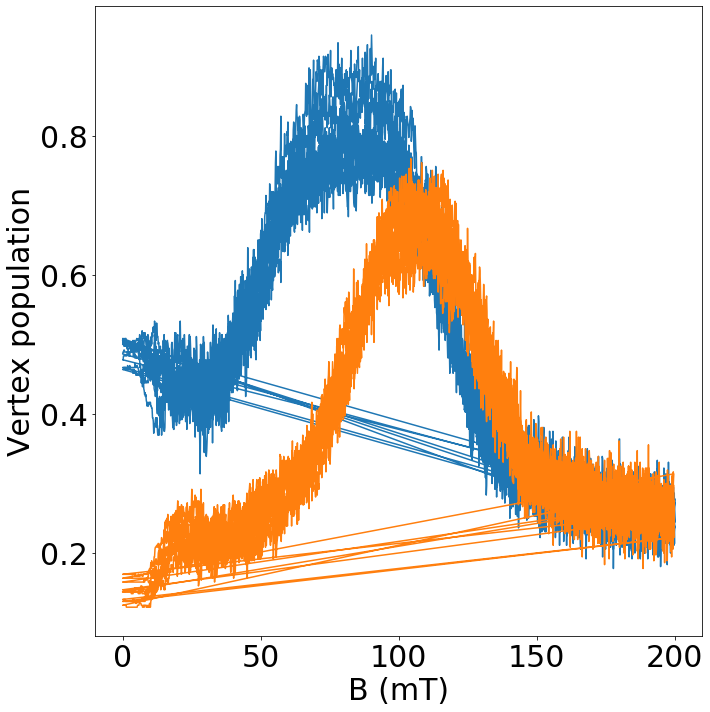

In [28]:
fig, ax1 = plt.subplots(figsize=(10,10))

for typ_m, mtype in dec_sep.groupby("type"):
    print(typ_m)
    plt.errorbar(mtype["field"], mtype["fraction"],fmt = '-', label = typ_m)
    
for typ_m, mtype in inc_sep.groupby("type"):
    print(typ_m)
    plt.errorbar(mtype["field"], mtype["fraction"],fmt = '-', label = typ_m)

    

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

#ax1.legend(fontsize = 18)
ax1.set_xlabel('B (mT)', size = 30)
ax1.set_ylabel('Vertex population', size = 30)

plt.tight_layout()

In [29]:
dec_sep.to_csv('Bajada_sep'+str(change_m_time)+'.dat',sep = '\t')
inc_sep.to_csv('Subida_sep'+str(change_m_time)+'.dat',sep = '\t')

## end parenthesis

In [30]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6"]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

dec["mean"]= 0
inc["mean"]= 0

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [31]:
count_m = inc.loc[:,["type","field"]].groupby(["Exp","field"]).apply(count_types)
increase = (count_m/inc.groupby(["Exp","field"]).count()).filter(["mean"])

count_b = dec.loc[:,["type","field"]].groupby(["Exp","field"]).apply(count_types)
decrese = (count_b/dec.groupby(["Exp","field"]).count()).filter(["mean"])

In [32]:
count_b

field   mean
Exp field type                
0   0.0   Type 1    0.0    1.0
          Type 2    0.0   87.0
          Type 3    0.0  181.0
          Type 4    0.0   46.0
          Type 5    0.0   76.0
...                 ...    ...
8   200.0 Type 2    0.0   93.0
          Type 3    0.0   88.0
          Type 4    0.0  110.0
          Type 5    0.0   98.0
          Type 6    0.0    5.0

[72036 rows x 2 columns]

In [33]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [34]:
field = np.linspace(0,200,50)


vert_prop_evenspace_m = increase.groupby(["Exp","type"]).apply(evenly_spaced,field)
vert_prop_evenspace_b = decrese.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [35]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [36]:
v_counts_b = vert_prop_evenspace_b.groupby(["field","type"]).mean()
v_counts_b["err"] = vert_prop_evenspace_b.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_b.groupby(["field","type"]).count().values)

In [37]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'serif'

In [38]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "orange", "green", "red", "purple", "cyan"]) 

In [39]:
v_counts_m.to_csv('Subida'+str(change_m_time)+'.dat',sep = '\t')
v_counts_b.to_csv('Bajada'+str(change_m_time)+'.dat',sep = '\t')

Type 1
Type 2
Type 3
Type 4
Type 5
Type 6


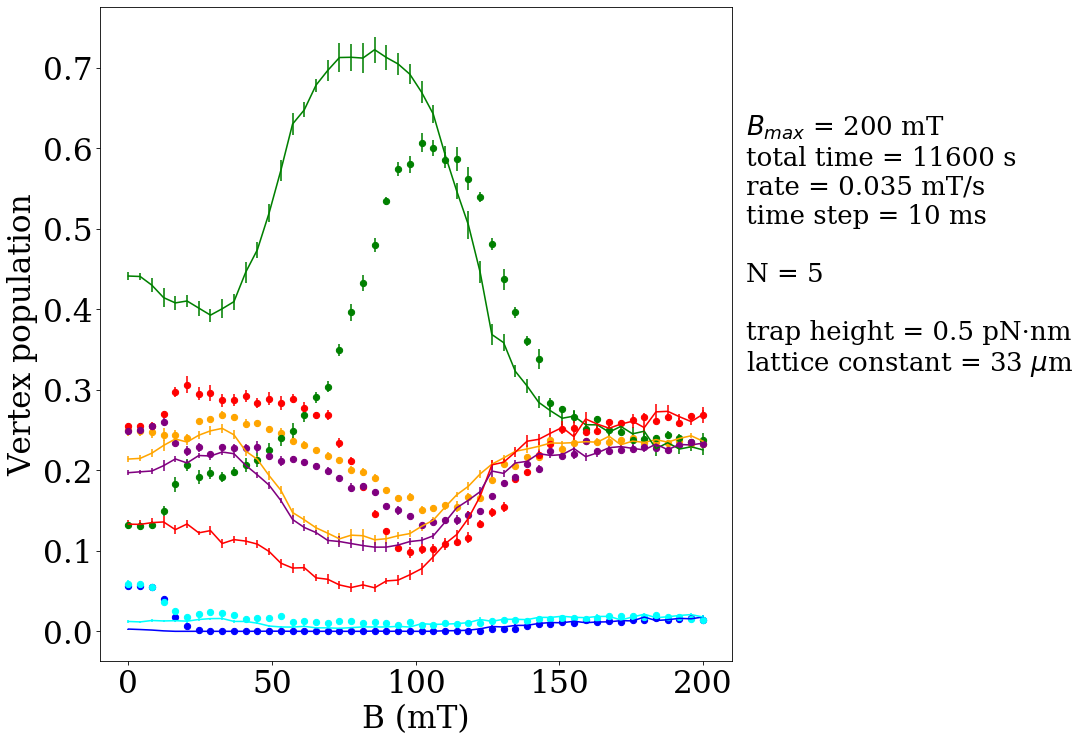

In [40]:
fig, ax1 = plt.subplots(figsize=(10,10))

for typ_m, mtype in v_counts_m.groupby("type"):
    print(typ_m)
    plt.errorbar(mtype.index.get_level_values("field"), mtype["mean"], yerr = mtype["err"],fmt = 'o', label = typ_m)
    
for typ, vtype in v_counts_b.groupby("type"):
    plt.errorbar(vtype.index.get_level_values("field"), vtype["mean"], yerr = vtype["err"],fmt = '-', label = typ)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

#ax1.legend(fontsize = 18)
ax1.set_xlabel('B (mT)', size = 30)
ax1.set_ylabel('Vertex population', size = 30)

plt.figtext(1,0.5,'$B_{max}$ = 200 mT \ntotal time = 11600 s \nrate = 0.035 mT/s \ntime step = 10 ms \n \nN = 5 \n \ntrap height = 0.5 pN·nm \nlattice constant = 33 $\mu$m', size = 25)
plt.tight_layout()
#plt.savefig('BidisperseIce_hysteresis_loop', bbox_inches='tight')